# PyTorch Crash Course

#### Overview:

1. Tensor Basics
  - Create, Operations, NumPy, GPU Support
2. Autograd
  - Linear regression example
3. Training Loop with: Model, Loss & Optimizer
  - A typical PyTorch training pipeline


## 1. Tensors

- Everything in PyTorch is based on Tensor operations. A Tensor is a multi-dimensional matrix containing elements of a single data type:

- Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other specialized hardware to accelerate computing.


In [ ]:
# !pip install torch

In [139]:
import torch
import numpy as np
import matplotlib.pyplot as plt


## Tensor Initialization

#### Directly from data

In [140]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data, dtype=torch.int32)
x_data, x_data.dtype

(tensor([[1, 2],
         [3, 4]], dtype=torch.int32),
 torch.int32)

#### From a NumPy array

In [141]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np, x_np.shape

(tensor([[1, 2],
         [3, 4]]),
 torch.Size([2, 2]))

#### From another tensor

In [142]:
x_rand = torch.rand_like(x_data, dtype=torch.float)  # overrides the datatype of x_data
x_rand

tensor([[0.6606, 0.7099],
        [0.0071, 0.3256]])

#### With random or constant values:

In [143]:
shape = (2, 3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.3680, 0.7489, 0.8839],
        [0.6919, 0.1701, 0.6152]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


## Tensor Attributes

In [144]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## Tensor Operation

- all tensor operation listed [here](https://pytorch.org/docs/stable/torch.html)

In [145]:
# Operations
x = torch.ones(2, 2)
y = torch.rand(2, 2)
x, y

(tensor([[1., 1.],
         [1., 1.]]),
 tensor([[0.5057, 0.5020],
         [0.6293, 0.8230]]))

elementwise addition

In [146]:
z = x + y
# alternative method
k = torch.add(x, y)
z, k

(tensor([[1.5057, 1.5020],
         [1.6293, 1.8230]]),
 tensor([[1.5057, 1.5020],
         [1.6293, 1.8230]]))

***In place addition, everything with a trailing underscore is an inplace operation***

In [147]:
y.add_(x)
print(f"In place addition:\n {y}")

In place addition:
 tensor([[1.5057, 1.5020],
        [1.6293, 1.8230]])


subtraction

In [148]:
z = x - y
z = torch.sub(x, y)
z

tensor([[-0.5057, -0.5020],
        [-0.6293, -0.8230]])

multiplication

In [149]:
print(x, y)
z = x * y
z = torch.mul(x, y)
z

tensor([[1., 1.],
        [1., 1.]]) tensor([[1.5057, 1.5020],
        [1.6293, 1.8230]])


tensor([[1.5057, 1.5020],
        [1.6293, 1.8230]])

division

In [150]:
z = x / y
z = torch.div(x, y)
z


tensor([[0.6641, 0.6658],
        [0.6138, 0.5486]])

slicing

In [151]:
x = torch.rand(5, 3)
x

tensor([[0.8564, 0.7732, 0.3989],
        [0.1997, 0.8834, 0.7329],
        [0.1942, 0.3154, 0.7753],
        [0.4666, 0.7065, 0.0181],
        [0.0039, 0.0549, 0.9460]])

In [152]:
print("x[:, 0]", x[:, 0])  # all rows, column 0
print("x[1, :]", x[1, :])  # row 1, all columns
print("x[1, 1]", x[1, 1])  # element at 1, 1

x[:, 0] tensor([0.8564, 0.1997, 0.1942, 0.4666, 0.0039])
x[1, :] tensor([0.1997, 0.8834, 0.7329])
x[1, 1] tensor(0.8834)


reshape

In [153]:
# Reshape with torch.view()
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
# if -1 it pytorch will automatically determine the necessary size
print(x.shape, y.shape, z.shape)

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


#### GPU Support

By default all tensors are created on the CPU. But we can also move them to the GPU (if it's available ), or create them directly on the GPU.

In [154]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

x = torch.rand(2, 2).to(device)  # move tensors to GPU device

In [155]:
x = torch.rand(2, 2, device=device)  # or directy create them on GPU
x

tensor([[0.1324, 0.0829],
        [0.9752, 0.0955]])

## 2. Autograd

The autograd package provides automatic differentiation for all operations on Tensors. Generally speaking, *torch.autograd* is an engine for computing the vector-Jacobian product. It computes partial derivates while applying the chain rule.

Set `requires_grad = True`:

In [156]:
# requires_grad = True -> tracks all operations on the tensor.
x = torch.randn(3, requires_grad=True)
y = x + 2

# y was created as a result of an operation, so it has a grad_fn attribute.
# grad_fn: references a Function that has created the Tensor
print(x)  # created by the user -> grad_fn is None
print(y)
print(y.grad_fn)

tensor([ 1.3108, -1.1423, -0.3763], requires_grad=True)
tensor([3.3108, 0.8577, 1.6237], grad_fn=<AddBackward0>)


In [157]:
# Do more operations on y
z = y * y * 3
print(z)
z = z.mean()
print(z)

tensor([32.8841,  2.2071,  7.9092], grad_fn=<MulBackward0>)
tensor(14.3335, grad_fn=<MeanBackward0>)


In [158]:
# Let's compute the gradients with backpropagation
# When we finish our computation we can call .backward() and have all the gradients computed automatically.
# The gradient for this tensor will be accumulated into .grad attribute.
# It is the partial derivate of the function w.r.t. the tensor

print(x.grad)
z.backward()
print(x.grad)  # dz/dx

# !!! Careful!!! backward() accumulates the gradient for this tensor into .grad attribute.
# !!! We need to be careful during optimization !!! optimizer.zero_grad()

None
tensor([6.6216, 1.7155, 3.2474])


#### Stop a tensor from tracking history:
For example during the training loop when we want to update our weights, or after training during evaluation. These operations should not be part of the gradient computation. To prevent this, we can use:

- `x.requires_grad_(False)`
- `x.detach()`
- wrap in `with torch.no_grad():`

In [159]:
a = torch.randn(2, 2)
b = (a * a).sum()

a.requires_grad_(True)
b = (a * a).sum()
print(a.requires_grad)
print(b.grad_fn)

True


In [160]:
# .detach(): get a new Tensor with the same content but no gradient computation:
a = torch.randn(2, 2, requires_grad=True)
b = a.detach()
print(a.requires_grad)
print(b.requires_grad)

True
False


In [161]:
# wrap in 'with torch.no_grad():'
a = torch.randn(2, 2, requires_grad=True)
print(a.requires_grad)
with torch.no_grad():
    b = a**2
    print(b.requires_grad)

True
False


## Gradient Descent Autograd
Linear Regression example:

$f(x) = w * x + b$

here : `f(x) = 2 * x`

In [162]:
import torch

# Linear regression
# f = w * x  + b
# here : f = 2 * x

X = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8, 10, 12, 14, 16], dtype=torch.float32)
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model output
def forward(x):
    return w * x


# loss = MSE
def loss(y, y_pred):
    return ((y_pred - y) ** 2).mean()


X_test = 5.0

print(f"Prediction before training: f({X_test}) = {forward(X_test).item()}")

Prediction before training: f(5.0) = 0.0


### Before doing any gradient descent, lets visualize the loss value for random values of w. 

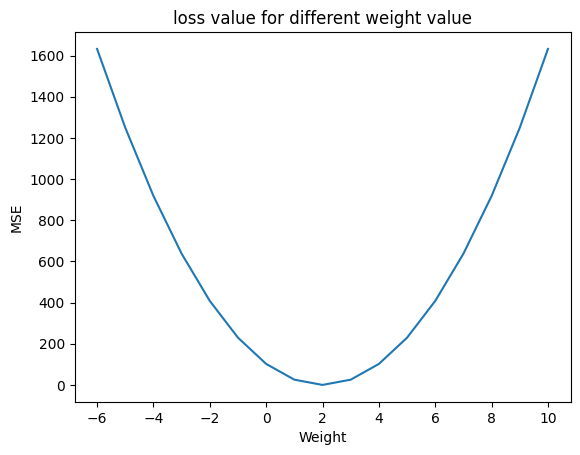

In [163]:
losses = []
for i in range(-6, 11, 1):
    weight = torch.tensor(i, dtype=torch.float32, requires_grad=True) 
    prediction = weight * X
    mean_square_error = ((prediction - Y) ** 2).mean()
    losses.append(mean_square_error.item())

plt.plot(range(-6, 11), losses)
plt.xlabel('Weight')
plt.ylabel('MSE')
plt.title("loss value for different weight value")
plt.show()


***Instead of plugging in numerous values for weight to find the lowest point in the cost function, we use gradient descent to find it relatively quickly.***


In [164]:
# Training
learning_rate = 0.01
n_epochs = 5
loss_history = []

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

for epoch in range(n_epochs):
    # predict = forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)
    # calculate gradients = backward pass
    l.backward()
    loss_history.append(l.item())
    # update weights
    with torch.no_grad():
        w -= learning_rate * w.grad

    # zero the gradients after updating
    w.grad.zero_()

    print(f"epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.3f}")

print(f"Prediction after training: f({X_test}) = {forward(X_test).item():.3f}")

epoch 1: w = 1.020, loss = 102.000
epoch 2: w = 1.520, loss = 24.490
epoch 3: w = 1.765, loss = 5.880
epoch 4: w = 1.885, loss = 1.412
epoch 5: w = 1.944, loss = 0.339
Prediction after training: f(5.0) = 9.718


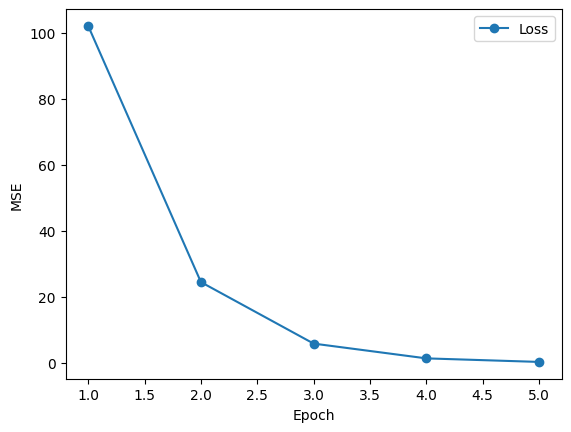

In [165]:
plt.plot(range(1, n_epochs+1), loss_history, marker='o', label='Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

## 3. Model, Loss & Optimizer

A typical PyTorch pipeline looks like this:

1. Design model (input, output, forward pass with different layers)
2. Construct loss and optimizer
3. Training loop:
  - Forward = compute prediction and loss
  - Backward = compute gradients
  - Update weights

In [166]:
import torch
import torch.nn as nn

# Linear regression
# f = w * x
# here : f = 2 * x

# 0) Training samples, watch the shape!
X = torch.tensor([[1], [2], [3], [4], [5], [6], [7], [8]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8], [10], [12], [14], [16]], dtype=torch.float32)

n_samples, n_features = X.shape
print(f"n_samples = {n_samples}, n_features = {n_features}")

# 0) create a test sample
X_test = torch.tensor([5], dtype=torch.float32)

n_samples = 8, n_features = 1


In [167]:
# 1) Design Model, the model has to implement the forward pass!

# Here we could simply use a built-in model from PyTorch
# model = nn.Linear(input_size, output_size)


class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define different layers
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)

In [168]:
input_size, output_size = n_features, n_features

model = LinearRegression(input_size, output_size)

print(f"Prediction before training: f({X_test.item()}) = {model(X_test).item():.3f}")

# 2) Define loss and optimizer
learning_rate = 0.01
n_epochs = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
for epoch in range(n_epochs):
    # predict = forward pass with our model
    y_predicted = model(X)
    # loss
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if (epoch + 1) % 10 == 0:
        w, b = model.parameters()  # unpack parameters
        print("epoch ", epoch + 1, ": w = ", w[0][0].item(), " loss = ", l.item())

print(f"Prediction after training: f({X_test.item()}) = {model(X_test).item():.3f}")

Prediction before training: f(5.0) = -2.933
epoch  10 : w =  2.044365406036377  loss =  0.014005221426486969
epoch  20 : w =  2.0439953804016113  loss =  0.012701527215540409
epoch  30 : w =  2.0422708988189697  loss =  0.011724915355443954
epoch  40 : w =  2.0406131744384766  loss =  0.010823395103216171
epoch  50 : w =  2.0390207767486572  loss =  0.009991179220378399
epoch  60 : w =  2.0374906063079834  loss =  0.00922298151999712
epoch  70 : w =  2.036020278930664  loss =  0.00851382128894329
epoch  80 : w =  2.0346078872680664  loss =  0.00785919465124607
epoch  90 : w =  2.0332508087158203  loss =  0.00725487619638443
epoch  100 : w =  2.031946897506714  loss =  0.006697048898786306
Prediction after training: f(5.0) = 9.980


##### Notebook credit: PyTorch documentation & Assembly AI